CHAPTER 4. 신경망 학습  
신경망 학습 : 가중치 찾기 => 손실함수 이용하여(for결과값↓, 함수의 기울기 활용 경사법)

<>

In [5]:
#평균제곱 오차 구현
import numpy as np
def mean_squared_error(y,t):        #y는 결과값 t는 정답값
    return 0.5 * np.sum((y-t)**2)   #y와 t의 평균제곱 오차 (Q.평균제곱오차 vs 오차제곱합) (1/2을 해주는 이유)

In [6]:
#평균제곱 오차 사용
import numpy as np                                          
def mean_squared_error(y,t):                                                
    return 0.5 * np.sum((y-t)**2)
#
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y),np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [ ]:
#교차 엔트로피 오차 구현
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) #delta는 갑자기 왜 나와?? 
                                        #-> y값이 0이 나올때 log y 값이 무한대형태이기 때문 따라서 아주 작은 값을 더해주는것

In [7]:
#교차 엔트로피 오차 사용
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) 
#
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [4]:
import sys,os                                                          #sys = system : 시스템 환경을 조절하기 위한 모듈이다. os : operating system                                  
sys.path.append(os.path.abspath('../../../'))                          #system에 path를 만들어준다  (os에 parent 디렉토리에 추가해달라)   (abspath = > 절대경로로 변환)                               
import numpy as np                                  
from dataset.mnist import load_mnist                #dataset 파일에서 load_mnist를 가져온다. load_mnist :  MNIST 데이터셋을 읽어오는것

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)  #normalize(정규화 : (여기서는) 255로 나누기 0~1사이의 값으로), one_hot_label(참인 결과만 1)
    
print(x_train.shape)    #60000행 784열 : 입력값
print(t_train.shape)    #60000행 10열 : 

(60000, 784)
(60000, 10)


In [5]:
#무작위 선택 함수 : 10장만 임의로 빼나보자
train_size = x_train.shape[0]
batch_size = 10                                                 #10장 뺴낼거다
batch_mask = np.random.choice(train_size, batch_size)           #train에서 batch사이즈 만큼 임의로 빼내기[배열생성]
x_batch = x_train[batch_mask]                                   #배열에 배열을 넣어줌 
t_batch = t_train[batch_mask]

In [28]:
print(np.random.choice(60000, 10))                              #복권생성기가능

[56105 39590 24076 24648 42485 22432 13209 53663  2732 16899]


In [8]:
#(배치용)교차 엔트로피 오차 구현            Q)y가 1차원일 경우가 있나?? 예시좀
import numpy as np
def cross_entropy_error(y,t): 
    print(y)                            #바꾸기 전과 후의 타입을 알아보기 위해 추가적으로 프린트를 해봤다.
    print(t)
    if y.ndim == 1:                     #미지수.ndim : number of array dimmension (배열의 차원을 알려준다) : y가 1차원일때(데이터 하나당)
        t = t.reshape(1, t.size)        #계산가능하도록 2차원 배열로 바꿔준다.
        y = y.reshape(1, y.size)        
        print(t.size)
        print(y)                        #바꾸기 전과 후의 타입을 알아보기 위해 추가적으로 프린트를 해봤다.
        print(t)
        
    batch_size = y.shape[0]
    print(y.shape[0])                   #shape[0]의 의미를 알기위해 추가적으로 print해주었다. ==> 몇장인지
    return -np.sum(t*np.log(y)) / batch_size

y=np.array([1,2,3])
t=np.array([4,5,6])
cross_entropy_error(y,t)


[1 2 3]
[4 5 6]
3
[[1 2 3]]
[[4 5 6]]
1


-10.057409634808385

In [10]:
#(원핫인코딩 아닐때 숫자 레이블로 주어졌을때)(배치용)교차 엔트로피 오차 구현
def cross_entropy_error(y,t):                     
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size    #np.log(y[np.arange(batch_size),t]) 는 정답의 예측값을 찾아간다는 소리이다.
                                                                        #ex)t=2일때 2에대한 예측값을 찾아간다는 뜻

<손실함수를 설정하는 이유>  
정확도 대신에 우회적인 손실함수의 값을 왜 사용하지?  
연속적인 값들을 이용하여 ***미분하기위하여*** (+계단함수대신 시그모이드 함수를 이용하는것도 같은 이유)

미분을 식으로 표현하여 보자

In [11]:
#미분을 식으로 구현 - 문제점이 2가지 있음
def numerical_diff(f,x):
    h=10e-50        #1. h값이 너무 작아서 오류를 일으킨다는 것
    return (f(x+h)-f(x)) / h    #2. h값이 너무 작아도 0에 가까워질 수 없기 때문에 f(x)가 들어간 이상 오차가 꽤 많이 나게됨

In [12]:
print(np.float32(1e-50))    #반올림 오차(소수점 8자리 이하 생략) : 너무 작은값이라 정확히 표현되지 않음

0.0


In [13]:
#수치 미분 구현 - 작은 차분으로 미분하는것
def numerical_diff(f,x):
    h = 1e-4    #0.0001
    return (f(x+h)-f(x-h)) / (2*h)  #두 점의 평균을 이용함으로써 f(x)에서의 진정한 접선에 조금 더 가까운 값을 갖을 수 있도록 설정

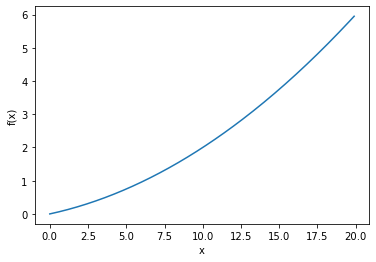

0.1999999999990898
0.2999999999986347


In [16]:
#수치 미분 예시 - 함수 구현하기 & 그래프 그려보기
import matplotlib.pylab as plt
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)   #np.arange [x에서 y까지 몇간격으로 배열 x를 만든다.]
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")  #f(x)대신 y로 써줘도 될까? 상관없음
plt.plot(x,y)
plt.show()

#x = 5일때의 미분 계산해보기
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

In [22]:
#편미분 
    #변수가 두개인 함수 구현
def function_2(x):
    return x[0]**2 + x[1]**2    #return np.sum(x**2)

In [24]:
#
    #편미분 문제 풀어보기 : 문제1 : x[0] == 3, x[1] == 4, x[0]에 대한 편미분은?
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [26]:
#
    #편미분 문제 풀어보기 : 문제2 : x[0] == 3, x[1] == 4, x[1]에 대한 편미분은?
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


In [28]:
#기울기 : 모든 변수의 편미분을 벡터로 정리한 것
def f(x) : 
    return x[0] + x[1]

def numerical_gradient(f,x):
    h = 1e-4    #0.0001
    grad = np.zeros_like(x) #x와 형상이 같은 배열 그 안의 원소는 모두 0
    
    for idx in range(x.size):
        tmp_val = x[idx]        #f(x+h) 계산
        x[idx] = tmp_val + h    #f(x+h)한 값을 넣어줌
        fxh1 = f(x)             
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val    #값 복원    함수는 일회용이 아니기 때문에 복원해줘야함 
        
    return grad

#
    #예시를 통해 직접 기울기를 구해보자
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


그렇다면 기울기가 의미하는것은 무엇일까?  
기울기 = 여러개의 변수들의 미분한 값들의 벡터  
벡터의 방향 == 각 장소에서 함수값을 가장 크게 줄이는 방향  
  
#경사법  
경사하강법  
: 기울기를 이용해 최솟값을 찾는 방법  
경사상승법  
: 기울기를 이용해 최댓값을 찾는 방법  
하지만 -를 이용하면 둘다 본질적으로 같은 것 => 경사하강법이 주로 쓰일때가 많다.  

In [29]:
#경사법
def gradient_descent(f, init_x, lr=0.01, step_num=100): #f는 최적화 하려는 함수, lr은 learning rate 학습률, step_num 반복 횟수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad  #-해줘야하는 이유는 -방향이면 +헤줘야하기 때문
    return x

#
    #예시를 통해 구해보기
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [32]:
#경사법
    #학습률이 1.너무 크거나 2.작은 경우 좋은 결과 X ==> 실제 미분결과와 많이 다르기 때문
    #1. 큰경우 ==> 너무 큰값으로 발산해버림
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

#
    #2. 작은경우 ==> 거의 갱신이 X
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


하이퍼 파라미터 : 가중치 bias와 다르게 사람이 직접 설정해줘야하는 매개변수

#신경망에서의 기울기 ==> 가중치(W)와 손실함수(L)의 관계 경사  
    ->∂L/∂W : w를 조금 변경했을때 L이 얼마나 변화했느냐   
        ->W의 형상과 같음

In [ ]:
import sys, os
sys.path.append()